# Variant Pathogenicity Prediction


&emsp;&emsp;With the maturation of high-throughput sequencing technologies, the number of variants generated in clinical testing has grown exponentially. How to **quickly and accurately determine the pathogenicity risk** of variants in massive datasets has become a core challenge in genetic diagnosis, genetic counseling, and precision medicine. Traditional variant interpretation relies on manual rules or single-feature scoring models, which often perform limitedly in complex contexts. There is an urgent need for more intelligent and generalizable models to improve clinical interpretation efficiency and accuracy.


The [ClinVar database](https://www.ncbi.nlm.nih.gov/clinvar/) is an authoritative public resource maintained by NCBI that systematically collects gene variants and their clinical interpretation information submitted by laboratories, clinical institutions, and research teams worldwide. It is one of the most important standard data sources for clinical variant interpretation. The database has the following characteristics:

- Covers multiple variant types (SNV, InDel, CNV, etc.);

- Provides clear clinical significance labels (Pathogenic, Likely Pathogenic, VUS, Benign, etc.);


&emsp;&emsp;Through supervised fine-tuning and task customization, our independently developed [Genos-10B](https://huggingface.co/BGI-HangzhouAI/Genos-10B) basic model (a large model with 10B parameters for genomic sequences) has the ability to predict the pathogenic risk of mutations and determine their clinical significance. In evaluation tasks related to ClinVar data, it performs better compared to mainstream models such as Evo2, Generator, and NT.

![image][image id]



[image id]: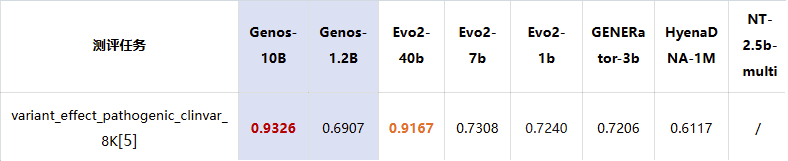

&emsp;&emsp;For the trained variant pathogenicity prediction model, we have opened an API calling service. **To ensure you can successfully use the service, please make sure you have completed the [token](https://cloud.stomics.tech/#/personal-center?tab=apiKey) application.**


In [ ]:
# If genos is not installed in the environment, install the genos package first
# pip install genos-client


In [1]:
from genos import create_client

# Create client, replace with your token
client = create_client(token="<your_api_key>")


After creating the client, we can quickly call the service interface through the ```variant_predict``` function for variant analysis


- Parameter Description
    - assembly: Reference genome version, supports "hg19" or "hg38"
    - chrom: Chromosome number, e.g., "chr1", "chr2", ..., "chrX", etc.
    - pos: Specific base position on the genome (1-based coordinate)
    - ref: Reference allele, e.g., "A", "T", "C", "G"
    - alt: Alternate allele, e.g., "A", "T", "C", "G"


In [2]:
result = client.variant_predict(
            assembly="hg19",
            chrom="chr6", 
            pos=51484075,
            ref="T",
            alt="G"
        )


In [3]:
result['result']


{'variant': 'chr6-51484075-T-G',
 'prediction': 'Benign',
 'score_Benign': 0.853630542755127,
 'score_Pathogenic': 0.14636942744255066}

## Return Result Description

```yaml
{
  'variant': 'chr6-51484075-T-G',
  'prediction': 'Benign',
  'score_Benign': 0.853630542755127,
  'score_Pathogenic': 0.14636942744255066
 }
```

The return result is a dictionary containing the following fields:
- 'prediction': The model's pathogenicity prediction result for this variant, such as 'Benign' (benign) or 'Pathogenic' (pathogenic);
- 'score_Benign': The probability score for the variant being benign, with a value range of 0~1;
- 'score_Pathogenic': The probability score for the variant being pathogenic, with a value range of 0~1;
- 'variant': Specific variant site information, formatted as 'chromosome-position-reference_allele-alternate_allele', using [CPRA format](https://pmc.ncbi.nlm.nih.gov/articles/PMC6834861/) (e.g., 'chr6-51484075-T-G').

